# KModes

In [5]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt


## Fetch data & prepare it

In [6]:
df_data = pd.read_csv('data/training_set.csv', sep=',', index_col=0)

rows = df_data.shape[0]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves:

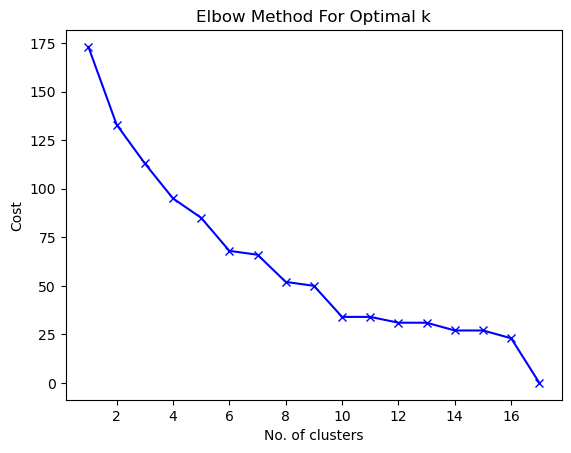

In [7]:
# Elbow curve to find optimal K
cost = []
K = range(1,rows + 1)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=1, random_state=23)
    kmode.fit_predict(df_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### Number of clusters

In [8]:
k = 7

# Building the model with 3 clusters
kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_data)
# clusters

df_result = df_data
df_result.insert(0, "Cluster", clusters, True)
df_result

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 80.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 73.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 78.0
Run 4, iteration: 2/100, moves: 0, cost: 78.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 85.0
Run 5, iteration: 2/100, moves: 1, cost: 69.0
Run 5, iteration: 3/100, moves: 0, cost: 69.0
Best run was number 5


,Cluster,53A,97A,87A,83A,82A,81A,95A,138A,143G,...,89A,96A,69A,51A,26A,72A,37A,92A,33A,101A
LANG_ID,,,,,,,,,,,,,,,,,,,,,
rus,1,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,4.0,...,1.0,4.0,4.0,1.0,2.0,4.0,5.0,3.0,2.0,1.0
cze,1,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,4.0,...,1.0,4.0,4.0,1.0,3.0,4.0,5.0,6.0,2.0,2.0
ger,5,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,4.0,...,1.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
iri,2,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,4.0,...,1.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
nor,0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0,...,1.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
ita,3,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,4.0,...,1.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
fre,6,7.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,4.0,...,1.0,4.0,2.0,7.0,2.0,4.0,1.0,1.0,2.0,1.0
fin,1,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,4.0,...,1.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,6.0
swe,0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0,...,1.0,4.0,2.0,9.0,2.0,4.0,3.0,6.0,2.0,1.0


## Visualize

In [9]:
import geopandas as gpd

df_lang = pd.read_csv('data/european_languages.csv', sep=',',index_col=0)[['Name', 'Latitude', 'Longitude']]
# df_lang
df_visu = df_result[['Cluster']].join(df_lang, how='inner')

<AxesSubplot: >

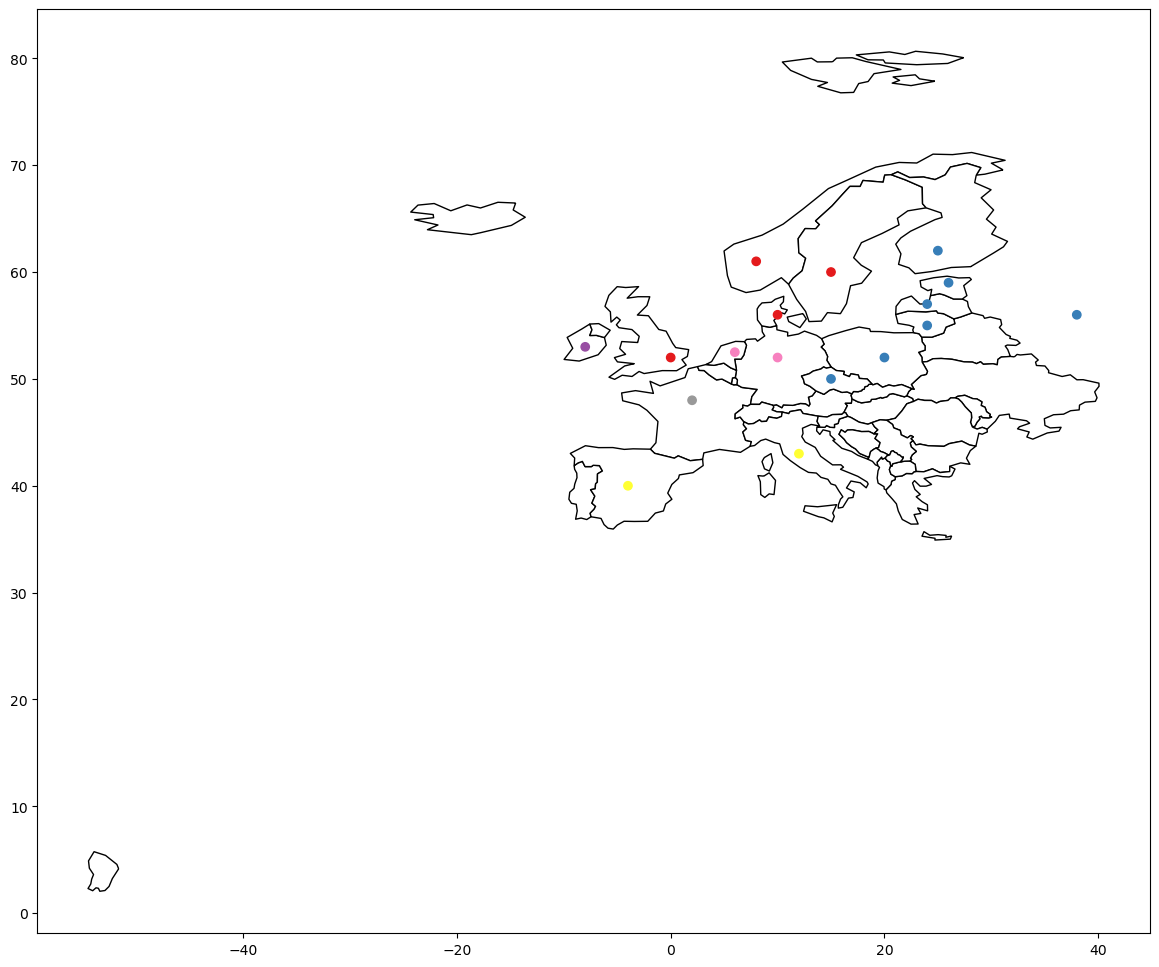

In [10]:
gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

filter = ((gdf_world['continent'] == 'Europe') & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map

gdf = gpd.GeoDataFrame(df_visu, geometry=gpd.points_from_xy(df_visu['Longitude'], df_visu['Latitude']))

ax = gdf_world[filter].plot(figsize=(20, 12), color='white', edgecolor='black')
gdf.plot(column='Cluster', categorical=True, cmap='Set1', ax=ax, marker='o' )